In [1]:
import sys
sys.path.insert(1, '/home/msantolaria/Documents/MyPythonLibrary/ClimAnag/')
import climbasis as climb
from climbasis import *
import domain as dom
import myplot
import glob

In [2]:
from eofs.xarray import Eof

In [3]:
source='/home/msantolaria/Documents/MyResearch/HMA-ClimAnalogs/Observations/'
resultsDir=source + 'Results/'
plotsDir=source + 'Plots/'

In [4]:
#resultsDir='/media/maria/MARIAEXT2/WinterTrendsObs/'
sourceData='/home/msantolaria/Documents/Data/'

In [5]:
#!ls /home/maria/Documents/Data/HadSLP2/

In [6]:
variable='slp'
units='hPa'
domain='MA'
season='DJFMA'
iyr=1982
fyr=2014

In [6]:
model1='hadslp2'
filename1 = 'slp.mon_hadslp2_newtime_185001-201912.nc'
ds1 = xr.open_dataset(sourceData+model1+'/'+filename1)['slp']
print(ds1.units)

#ds1 = ds1.assign_coords(longitude=(((ds1.longitude + 180) % 360) - 180))
#ds1 = ds1.roll(longitude=int(len(ds1['longitude']) / 2), roll_coords=True)
#field1=dom.field_dom(ds1,domain)

hPa


In [7]:
ds1

<xarray.DataArray 'slp' (time: 2040, latitude: 37, longitude: 72)>
[5434560 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1850-01-01 1850-02-01 ... 2019-12-01
  * latitude   (latitude) float32 90.0 85.0 80.0 75.0 ... -80.0 -85.0 -90.0
  * longitude  (longitude) float32 0.0 5.0 10.0 15.0 ... 340.0 345.0 350.0 355.0
Attributes:
    long_name:  Redefining time dimension
    units:      hPa

In [8]:
model2=str('noaaV2c')
filename2 = 'prmsl_only.mon.mean.noaaV2c_185101-201412_2.0x2.0.nc'
ds2 = xr.open_dataset(sourceData+model2+'/'+filename2)['prmsl']
ds2 = ds2.assign_coords(lon=(((ds2.lon+ 180) % 360) - 180))
ds2 = ds2.roll(lon=int(len(ds2['lon']) / 2), roll_coords=True)
#print(ds1.units)
ds2=ds2/100
field2=dom.field_dom(ds2,domain)

MA latS,latN,lonW,lonE: slice(60, 10, None) slice(40, 130, None)
Domain;latS,latN,lonW,lonE: MA 10 60 40 130


In [9]:
model3=str('noaaV3')
filename3 = 'prmsl_only.mon.mean.noaaV3_185101-201412_1.0x1.0.nc'
ds3 = xr.open_dataset(sourceData+model3+'/'+filename3)['prmsl']
ds3 = ds3.assign_coords(lon=(((ds3.lon+ 180) % 360) - 180))
ds3 = ds3.roll(lon=int(len(ds3['lon']) / 2), roll_coords=True)
#print(ds1.units)
ds3=ds3/100
field3=dom.field_dom(ds3,domain)

MA latS,latN,lonW,lonE: slice(60, 10, None) slice(40, 130, None)
Domain;latS,latN,lonW,lonE: MA 10 60 40 130


In [10]:
model4=str('era5')
filename4='mslp_era5_NH_mon_1979-2020.nc'
ds4 = xr.open_dataset(sourceData+model4+'/'+filename4)['msl']
#print(ds1.units)
ds4=ds4/100
field4=dom.field_dom(ds4,domain)


MA latS,latN,lonW,lonE: slice(60, 10, None) slice(40, 130, None)
Domain;latS,latN,lonW,lonE: MA 10 60 40 130


In [11]:
model5=str('eraint')
filename5='mslp.mon.eraint_197901_201512.nc'
ds5 = xr.open_dataset(sourceData+model5+'/'+filename5)['msl']
#print(ds1.units)
ds5 = ds5.assign_coords(longitude=(((ds5.longitude+ 180) % 360) - 180))
ds5 = ds5.roll(longitude=int(len(ds5['longitude']) / 2), roll_coords=True)
ds5=ds5/100
field5=dom.field_dom(ds5,domain)


MA latS,latN,lonW,lonE: slice(60, 10, None) slice(40, 130, None)
Domain;latS,latN,lonW,lonE: MA 10 60 40 130


In [12]:
model6=str('ncep-ncar')
filename6='slp.mon.mean.ncep-ncar_194801-202203.nc'
ds6 = xr.open_dataset(sourceData+model6+'/'+filename6)['slp']
#print(ds1.units)
ds6 = ds6.assign_coords(lon=(((ds6.lon+ 180) % 360) - 180))
ds6 = ds6.roll(lon=int(len(ds6['lon']) / 2), roll_coords=True)
field6=dom.field_dom(ds6,domain)

MA latS,latN,lonW,lonE: slice(60, 10, None) slice(40, 130, None)
Domain;latS,latN,lonW,lonE: MA 10 60 40 130


In [13]:
dsList=[field1,field2,field3,field4,field5,field6]
modelList=[model1,model2,model3,model4,model5,model6]

In [14]:
valsList=[]
anomsList=[]

for elem in dsList:
    if season[0]=='D':
        print('Winter',iyr,'-',iyr+1,fyr-1,'-',fyr)
        vals,anoms=climb.seasonal_selection(elem,season,6,iyr,6,fyr)
    else:
        vals,anoms=climb.seasonal_selection(elem,season,1,iyr,12,fyr)
    valsList.append(vals)
    anomsList.append(anoms)

Winter 1982 - 1983 2013 - 2014
32
(D- 1982  JF- 1983  to D- 2013 JF- 2014
Winter 1982 - 1983 2013 - 2014
32
(D- 1982  JF- 1983  to D- 2013 JF- 2014
Winter 1982 - 1983 2013 - 2014
32
(D- 1982  JF- 1983  to D- 2013 JF- 2014
Winter 1982 - 1983 2013 - 2014
32
(D- 1982  JF- 1983  to D- 2013 JF- 2014
Winter 1982 - 1983 2013 - 2014
32
(D- 1982  JF- 1983  to D- 2013 JF- 2014
Winter 1982 - 1983 2013 - 2014
32
(D- 1982  JF- 1983  to D- 2013 JF- 2014


In [15]:
climList=[]
stdList=[]
for elem in valsList:
    c=elem.mean('time')
    s=elem.std('time')
    climList.append(c)
    stdList.append(s)

In [16]:
parList=[]
trendList=[]
interceptList=[]
rvalueList=[]
pvalueList=[]
stderrList=[]
#---------------------------------------------------------
for elem in anomsList:
    par=climb.trend_vect(elem.time,elem,'time')
    parList.append(par)
    trendList.append(par[0])
    interceptList.append(par[1])
    rvalueList.append(par[2])
    pvalueList.append(par[3])
    stderrList.append(par[4])


trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4


MA latS,latN,lonW,lonE: slice(60, 10, None) slice(40, 130, None)
Figure save at  /home/msantolaria/Documents/MyResearch/HMA-ClimAnalogs/Observations/Plots/ as clim_slp_hadslp2_obs_original_MA_DJFMA_1982_2014
MA latS,latN,lonW,lonE: slice(60, 10, None) slice(40, 130, None)
Figure save at  /home/msantolaria/Documents/MyResearch/HMA-ClimAnalogs/Observations/Plots/ as clim_slp_noaaV2c_obs_original_MA_DJFMA_1982_2014
MA latS,latN,lonW,lonE: slice(60, 10, None) slice(40, 130, None)
Figure save at  /home/msantolaria/Documents/MyResearch/HMA-ClimAnalogs/Observations/Plots/ as clim_slp_noaaV3_obs_original_MA_DJFMA_1982_2014
MA latS,latN,lonW,lonE: slice(60, 10, None) slice(40, 130, None)
Figure save at  /home/msantolaria/Documents/MyResearch/HMA-ClimAnalogs/Observations/Plots/ as clim_slp_era5_obs_original_MA_DJFMA_1982_2014
MA latS,latN,lonW,lonE: slice(60, 10, None) slice(40, 130, None)
Figure save at  /home/msantolaria/Documents/MyResearch/HMA-ClimAnalogs/Observations/Plots/ as clim_slp_erai

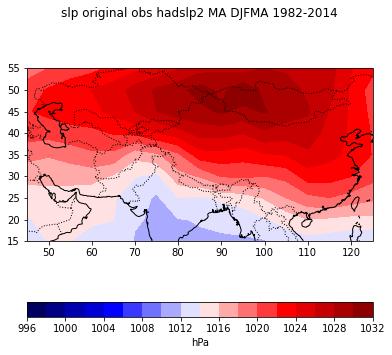

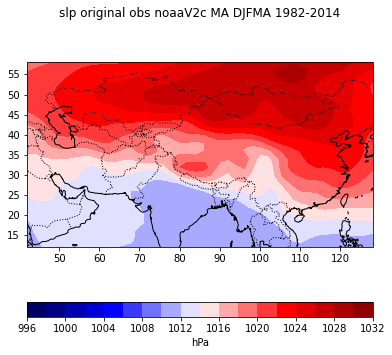

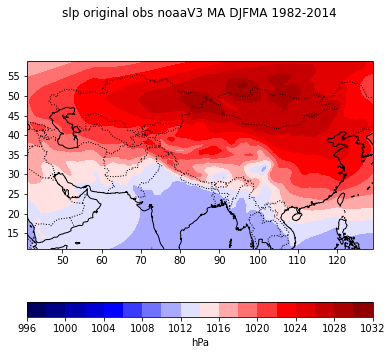

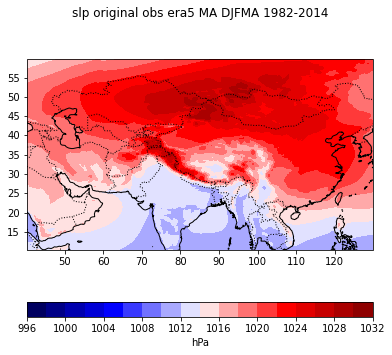

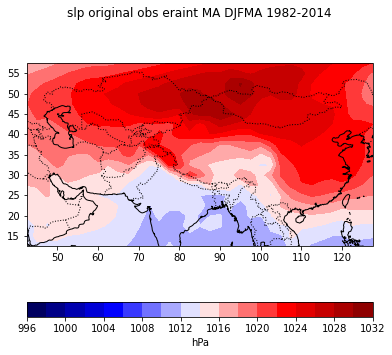

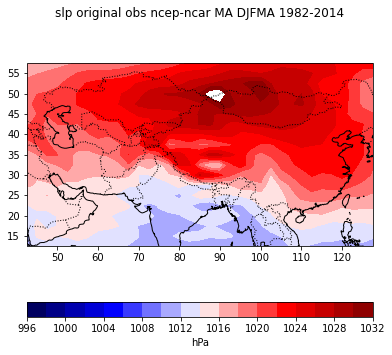

In [17]:
##Clim-----------------
clevs=np.arange(996,1034,2)
color='seismic'
subdomain=domain
exp='obs'
decomp='original'
for i in range(len(climList)):
    lat,lon=climb.latlon(climList[i])
    figclim=myplot.oneplot_ds(variable=variable, decomp=decomp, exp=exp, model=modelList[i], clevs=clevs, color=color, units=units, subdomain=subdomain, ds=climList[i], xlon=climList[i][lon], ylat=climList[i][lat], season=season, iyr=iyr, fyr=fyr,extent=False)
    ofileC='clim_'+variable+'_'+modelList[i]+'_'+exp+'_'+decomp+'_'+domain+'_'+season+'_'+str(iyr)+'_'+str(fyr)
    figclim.savefig(plotsDir+ofileC+'.png',format='png')
    print('Figure save at ',plotsDir, 'as',ofileC)

MA latS,latN,lonW,lonE: slice(60, 10, None) slice(40, 130, None)
Figure save at  /home/msantolaria/Documents/MyResearch/HMA-ClimAnalogs/Observations/Plots/ as anoms_std_slp_hadslp2_obs_original_MA_DJFMA_1982_2014
MA latS,latN,lonW,lonE: slice(60, 10, None) slice(40, 130, None)
Figure save at  /home/msantolaria/Documents/MyResearch/HMA-ClimAnalogs/Observations/Plots/ as anoms_std_slp_noaaV2c_obs_original_MA_DJFMA_1982_2014
MA latS,latN,lonW,lonE: slice(60, 10, None) slice(40, 130, None)
Figure save at  /home/msantolaria/Documents/MyResearch/HMA-ClimAnalogs/Observations/Plots/ as anoms_std_slp_noaaV3_obs_original_MA_DJFMA_1982_2014
MA latS,latN,lonW,lonE: slice(60, 10, None) slice(40, 130, None)
Figure save at  /home/msantolaria/Documents/MyResearch/HMA-ClimAnalogs/Observations/Plots/ as anoms_std_slp_era5_obs_original_MA_DJFMA_1982_2014
MA latS,latN,lonW,lonE: slice(60, 10, None) slice(40, 130, None)
Figure save at  /home/msantolaria/Documents/MyResearch/HMA-ClimAnalogs/Observations/Plo

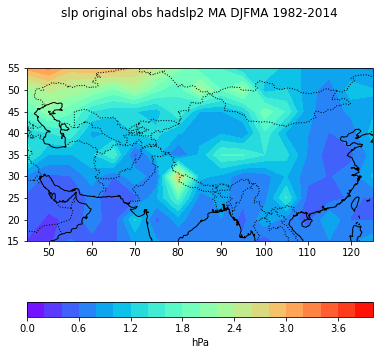

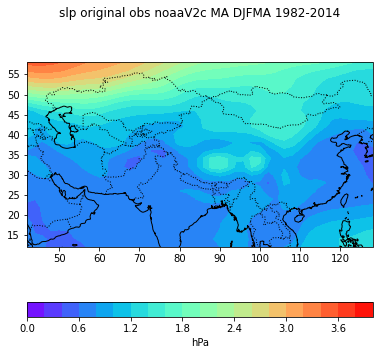

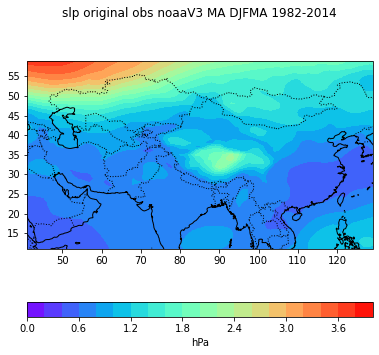

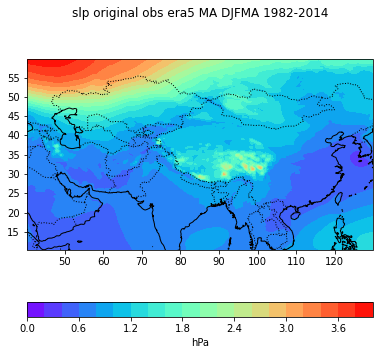

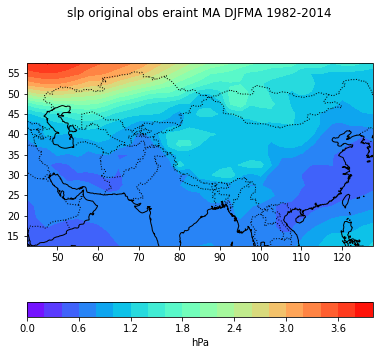

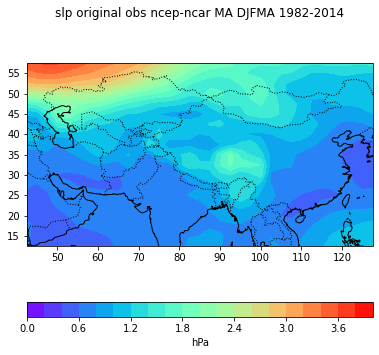

In [18]:
##STD-----------------
clevs=np.arange(0,4.2,0.2)
color='rainbow'
exp='obs'
decomp='original'
for i in range(len(stdList)):
    lat,lon=climb.latlon(stdList[i])
    figstd=myplot.oneplot_ds(variable=variable, decomp=decomp, exp=exp, model=modelList[i], clevs=clevs, color=color, units=units, subdomain=subdomain, ds=stdList[i], xlon=climList[i][lon], ylat=climList[i][lat], season=season, iyr=iyr, fyr=fyr,extent=False)
    ofileS='anoms_std_'+variable+'_'+modelList[i]+'_'+exp+'_'+decomp+'_'+domain+'_'+season+'_'+str(iyr)+'_'+str(fyr)
    figstd.savefig(plotsDir+ofileS+'.png',format='png')
    print('Figure save at ',plotsDir, 'as',ofileS)

MA latS,latN,lonW,lonE: slice(60, 10, None) slice(40, 130, None)
Figure save at  /home/msantolaria/Documents/MyResearch/HMA-ClimAnalogs/Observations/Plots/ as spatialtrend_slp_hadslp2_obs_original_MA_DJFMA_1982_2014
MA latS,latN,lonW,lonE: slice(60, 10, None) slice(40, 130, None)
Figure save at  /home/msantolaria/Documents/MyResearch/HMA-ClimAnalogs/Observations/Plots/ as spatialtrend_slp_noaaV2c_obs_original_MA_DJFMA_1982_2014
MA latS,latN,lonW,lonE: slice(60, 10, None) slice(40, 130, None)
Figure save at  /home/msantolaria/Documents/MyResearch/HMA-ClimAnalogs/Observations/Plots/ as spatialtrend_slp_noaaV3_obs_original_MA_DJFMA_1982_2014
MA latS,latN,lonW,lonE: slice(60, 10, None) slice(40, 130, None)
Figure save at  /home/msantolaria/Documents/MyResearch/HMA-ClimAnalogs/Observations/Plots/ as spatialtrend_slp_era5_obs_original_MA_DJFMA_1982_2014
MA latS,latN,lonW,lonE: slice(60, 10, None) slice(40, 130, None)
Figure save at  /home/msantolaria/Documents/MyResearch/HMA-ClimAnalogs/Obse

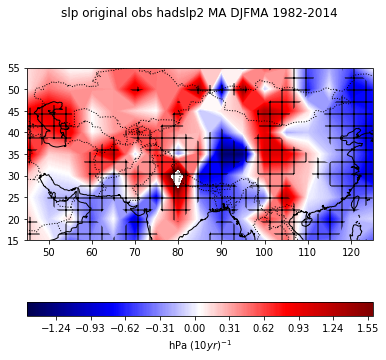

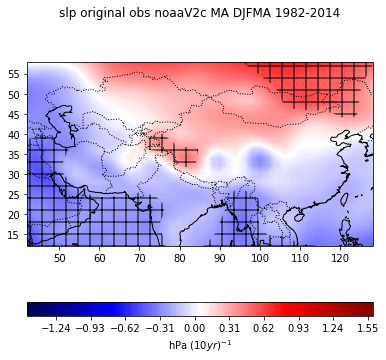

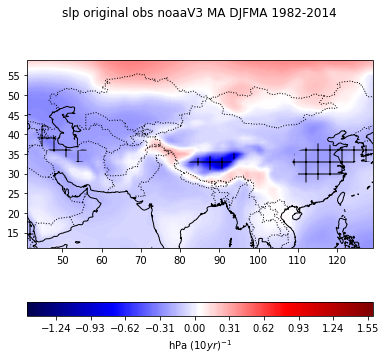

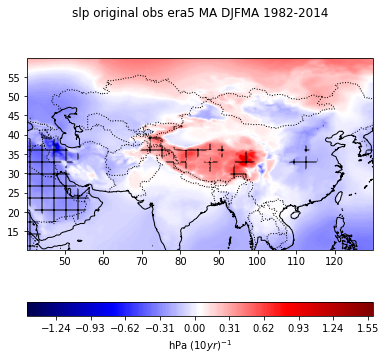

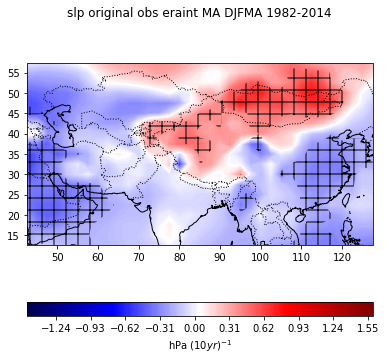

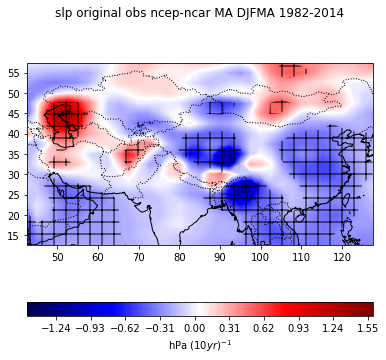

In [19]:
clevs=np.arange(-1.5,1.6,0.01)
#color='RdBu_r'
exp='obs'
decomp='original'
for i in range(len(parList)):
    lat,lon=climb.latlon(trendList[i])
    figtrend=myplot.oneplot_trend(variable=variable, decomp=decomp, exp=exp, model=modelList[i], clevs=clevs, units=units, subdomain=subdomain, par=parList[i], xlon=parList[i][0][lon], ylat=parList[i][0][lat], season=season, iyr=iyr, fyr=fyr,extent=False)
 #   figtrend=myplot.oneplot_trend(oneplot_trend(variable,decomp,exp,modelList[i],clevs,units,subdomain,parList[i],xlon,ylat,season,iyr,fyr))
    ofileT='spatialtrend_'+variable+'_'+modelList[i]+'_'+exp+'_'+decomp+'_'+domain+'_'+season+'_'+str(iyr)+'_'+str(fyr)
    figtrend.savefig(plotsDir+ofileT+'.png',format='png')
    print('Figure save at ',plotsDir, 'as',ofileT)